AUTO IDENTIFICATION OF HANDWRITING PHOTOS WITH ARTIFICIAL INTELLIGENCE

There are 784 feature columns (784 dimensions) in the MNIST handwritten figures database (which comes in sklearn), which we will use in our project, and there are 60,000 sample data and a 10,000 sample test set as a training set.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml  # mnist datasetini yüklemek için gerekli...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# This process may take a few minutes ...
mnist = fetch_openml('mnist_784')

In [2]:
mnist.data.shape


(70000, 784)

Let define function to see dataset in the photos

In [3]:
def showimage(dframe, index):    
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

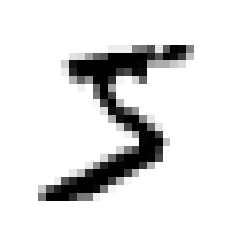

In [4]:
#example 

showimage(mnist.data, 0)

There is 70,000 image files and 784 sizes (784 features) for each image.


Split Data  -> Training Set and Test Set


In [5]:

# Let try test - train ratio  1/7 ve 6/7
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [6]:
type(train_img)

pandas.core.frame.DataFrame

In [7]:
# We are copying the train_img dataframe to check our number estimates, because it will change soon.

test_img_copy = test_img.copy()

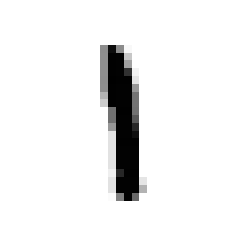

In [8]:
showimage(test_img_copy, 2)

The datas must scale.

Cause the scaling process simplifies PCA.

In [9]:
scaler = StandardScaler()

#It's enough to fit scaler on the just training-set 
scaler.fit(train_img)

# But we need to transform both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

##PCA

-variance protected by 90%

In [10]:
# Make an instance of the Model
pca = PCA(.90)

In [11]:
#its enough to fitting training set

pca.fit(train_img)

PCA(n_components=0.9)

In [12]:
#Let be checking our 784 dimensions ,decreased to how many dimensions

print(pca.n_components_)

234


In [13]:
#Resettings our new dimension value .

train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

## Step 2

Now, we will apply our Logistic Regression model, which is our 2nd Machine Learning model, on our PCA-processed dataset.

In [14]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

#### We train our LogisticRegression Model using our train data:

In [15]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

The model has trained,now lets predict our handwriting dataset

In [16]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

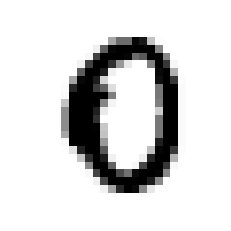

In [17]:
showimage(test_img_copy, 0)

In [18]:
logisticRegr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

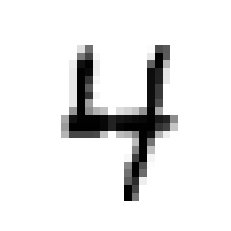

In [19]:
showimage(test_img_copy, 1)

### The Controlling of accuracy level

In [21]:
logisticRegr.score(test_img, test_lbl)

0.9196

# Conclusion

In this project, we significantly shortened the training time of AI by logistic regression using PCA. We choosed variance as %90.If you want , you can change the variance.Also we used mnist dataset from sklearn.

With this project, we learnt that we can bring together 2 completely different machine learning models and
we did a job by writing an artificial intelligence program on our computer!